# Analyze Impact of Operations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.simplefilter("default")
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")

def set_plotting_style(palette="mako"):
    # This sets reasonable defaults for font size for a figure that will go in a paper
    sns.set_context("paper")
    # Set the font to be serif, rather than sans
    sns.set(font='serif')

    # define colors
    sns.set_palette(palette, n_colors=9)
    # project_even_cols = [[44 / 255, 25 / 255, 149 / 255, .75], [147 / 255, 41 / 255, 223 / 255, .75],[0 / 255, 9 / 255, 43 / 255, .75]]

    # Make the background white, and specify the font family
    sns.set_style("ticks", {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]})
    
set_plotting_style()
palette="mako"

In [2]:
# These are the lower and upper bounds for decisions, the order: fast_one, fast_two, fast_four,
# slow_one, slow_two, slow_four, Number of transformers, PV_CAPA, STORAGE CAPA
# Note: we multiply PV_CAPA, STORAGE CAPA later by then. This is for decreasing the search area.

In [127]:
#solutions = ["RL_[64,64]_high_learning_iterations","Opt"]
weeks = list(np.arange(0,12,1))
states = list(np.arange(0,10,1))
path = "/Users/schroerk/Code/Research/EVCC_Sim/Cache/outputs/" 
file = "experienceFacility_KoeBogen_PopulationExp.csv"
energy_delivered = 20394.32666666668 #kwh over 7 day optimization horizon

In [130]:
energy_delivered/7

2913.47523809524

## Impact of Routing Strategy

Select LLF Charging, TA storage, vary routing

In [225]:
routing_algos=["random","CapaMatch","LUF"]
charging_algos=["FCFS","LLF","optimal"] # FCFS = first-come-first-served, LLF = least-laxity-first #,"optimal"
storage_algos = ["TA"] # TA = temp arbitrage
facilities = ["Facility_1"]
fac_dict = {"Facility_KoeBogen":"Destination","Facility_1":"Mixed-use","Facility_6":"Workplace"}


df_combined = pd.DataFrame([])
for fac in facilities:    
    
    for routing_algo in routing_algos:
        for charging_algo in charging_algos:
            for storage_algo in storage_algos:
    
                file = "experience{}_{}_{}_{}_Tr_Prices.csv".format(fac,routing_algo,charging_algo,storage_algo)
                print(file)
                df = pd.read_csv(path+file)
                cols=["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple" ,"Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity","Objective"]
                df.drop(columns="Unnamed: 0",inplace=True)    
                df.columns = cols

                df["PV\ncapacity"]= df["PV\ncapacity"]*10
                df["Grid\nupgrade"]= df["Grid\nupgrade"]*200
                df["Storage\ncapacity"]= df["Storage\ncapacity"]*50 #multiply by 50
                df["Objective_daily"]= df["Objective"]/7
                df["Objective_daily_perkWh"] = (df["Objective"]/7) / (energy_delivered/7)
                df["$C_h$"] =  df["Objective_daily_perkWh"]

                df.sort_values(by="Objective",ascending=True,inplace=True)
                df = df.head(1)
                #df.drop(columns="objective",inplace=True)

                #transpose and align
                df=df.T
                df.reset_index(inplace=True)
                df.columns = ["item","value"]
                df["facility"] = fac
                df["routing"] = routing_algo
                df["charging"] = charging_algo
                df["storage"] = storage_algo
                df["facility_type"] = df["facility"].apply(lambda x: fac_dict[x])
                df["experiment"] = "{}_{}_{}".format(routing_algo,charging_algo,storage_algo)


                df_combined = df_combined.append(df,ignore_index = True)

experienceFacility_1_random_FCFS_TA_Tr_Prices.csv
experienceFacility_1_random_LLF_TA_Tr_Prices.csv
experienceFacility_1_random_optimal_TA_Tr_Prices.csv
experienceFacility_1_CapaMatch_FCFS_TA_Tr_Prices.csv
experienceFacility_1_CapaMatch_LLF_TA_Tr_Prices.csv
experienceFacility_1_CapaMatch_optimal_TA_Tr_Prices.csv
experienceFacility_1_LUF_FCFS_TA_Tr_Prices.csv
experienceFacility_1_LUF_LLF_TA_Tr_Prices.csv
experienceFacility_1_LUF_optimal_TA_Tr_Prices.csv


In [226]:
df_combined

,item,value,facility,routing,charging,storage,facility_type,experiment
0,DC\nsingle,0.000000,Facility_1,random,FCFS,TA,Mixed-use,random_FCFS_TA
1,DC\ndouble,0.000000,Facility_1,random,FCFS,TA,Mixed-use,random_FCFS_TA
2,DC\nquadruple,0.000000,Facility_1,random,FCFS,TA,Mixed-use,random_FCFS_TA
3,AC\nsingle,96.000000,Facility_1,random,FCFS,TA,Mixed-use,random_FCFS_TA
4,AC\ndouble,14.000000,Facility_1,random,FCFS,TA,Mixed-use,random_FCFS_TA
...,...,...,...,...,...,...,...,...
112,Storage\ncapacity,400.000000,Facility_1,LUF,optimal,TA,Mixed-use,LUF_optimal_TA
113,Objective,1301.108379,Facility_1,LUF,optimal,TA,Mixed-use,LUF_optimal_TA
114,Objective_daily,185.872626,Facility_1,LUF,optimal,TA,Mixed-use,LUF_optimal_TA
115,Objective_daily_perkWh,0.063798,Facility_1,LUF,optimal,TA,Mixed-use,LUF_optimal_TA


In [228]:
df_combined_objective = df_combined[(df_combined["item"]=="Objective")&(df_combined["routing"].isin(["LUF"])==False)]
df_combined_pivot = df_combined_objective.pivot("routing", "charging", "value")

In [232]:
df_combined_pivot

charging,FCFS,LLF,optimal
routing,,,
CapaMatch,1287.036936,1328.550604,1264.200251
random,1290.989020,1348.858129,1294.663447


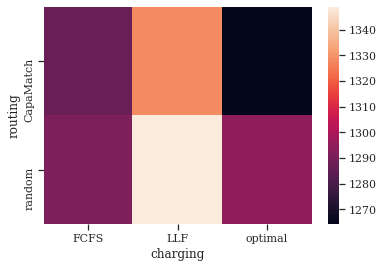

In [231]:
ax = sns.heatmap(df_combined_pivot)

In [221]:
routing = ["random","CapaMatch","LUF"]
charging = ["LLF"]
storage = ["TA"]
data = df_combined[(df_combined["routing"].isin(routing)==True)&(df_combined["charging"].isin(charging)==True)&(df_combined["storage"].isin(storage)==True)]

Decision Variables

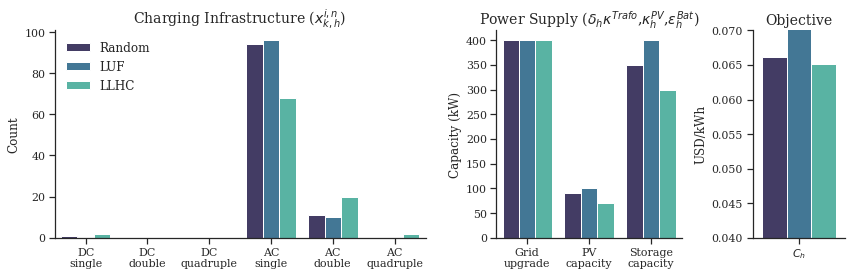

In [208]:
fig,axes=plt.subplots(nrows=1, ncols= 3, figsize=(12,4),sharex=False, gridspec_kw={'width_ratios': [2, 1,0.5]})
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

order = ["random_{}_{}".format(charging[0],storage[0]),"LUF_{}_{}".format(charging[0],storage[0]),"CapaMatch_{}_{}".format(charging[0],storage[0])]

data_plot=data

ax=axes[0]
data_1=data_plot[data_plot["item"].isin(["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple"])==True]
sns.barplot(ax=ax,data=data_1,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.set_title("Charging Infrastructure ($x^{i,n}_{k,h}$)",fontsize=14)

label_list = []
for t in ax.get_legend_handles_labels():
    # the first result will be all handles, i.e. the dots in the legend
    # the second result will be all legend text
    label_list.append(t)

ax.legend(handles=label_list[0], labels=["Random","LUF","LLHC"],loc="upper left",frameon=False,fontsize=12,)

ax=axes[1]
data_2=data_plot[data_plot["item"].isin(["Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity"])==True]
sns.barplot(ax=ax,data=data_2,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Power Supply ($\delta_h \kappa^{Trafo}$,$\kappa^{PV}_{h}$,$\epsilon^{Bat}_h$)",fontsize=14)


ax=axes[2]
data_3=data_plot[data_plot["item"].isin(["$C_h$"])==True]
sns.barplot(ax=ax,data=data_3,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Objective",fontsize=14)
ax.set_ylim((0.04,0.07))

#set lables
#for ax in axes:
#    ax.set_xlabel("State")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("")
#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[1].set_ylabel("Capacity (kW)")
axes[1].set_xlabel("")

#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[2].set_ylabel("USD/kWh")
axes[2].set_xlabel("")

sns.despine(ax=axes[0], left=False, bottom=False)
sns.despine(ax=axes[1])
sns.despine(ax=axes[2])

plt.tight_layout()
plt.savefig("../visuals_output/routing_impact_analysis.pdf")
plt.show()

Costs

In [116]:
data_costs = data[data["item"]=="Objective"]
data_costs["value_norm"] = data_costs["value"]/data_costs["value"].max()
data_costs

,item,value,facility,routing,charging,storage,facility_type,experiment,value_norm
29,Objective,184.951921,Facility_1,random,optimal,TA,Mixed-use,random_optimal_TA,0.995047
59,Objective,180.600036,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA,0.971633
89,Objective,185.872626,Facility_1,LUF,optimal,TA,Mixed-use,LUF_optimal_TA,1.000000


## Impact of Charging Strategy

In [184]:
routing = ["CapaMatch"]
charging = ["FCFS","LLF","optimal"]
storage = ["TA"]

data = df_combined[(df_combined["routing"].isin(routing)==True)&(df_combined["charging"].isin(charging)==True)&(df_combined["storage"].isin(storage)==True)]

In [187]:
#data

Decision Variables

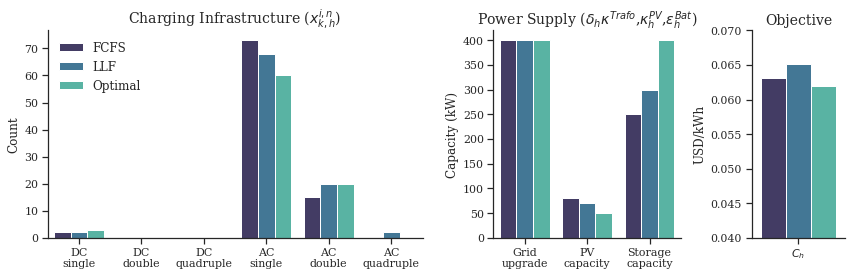

In [186]:
fig,axes=plt.subplots(nrows=1, ncols= 3, figsize=(12,4),sharex=False, gridspec_kw={'width_ratios': [2, 1,0.5]})
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

order = ["{}_FCFS_{}".format(routing[0],storage[0]),"{}_LLF_{}".format(routing[0],storage[0]),"{}_optimal_{}".format(routing[0],storage[0])]

data_plot=data

ax=axes[0]
data_1=data_plot[data_plot["item"].isin(["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple"])==True]
sns.barplot(ax=ax,data=data_1,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.set_title("Charging Infrastructure ($x^{i,n}_{k,h}$)",fontsize=14)

label_list = []
for t in ax.get_legend_handles_labels():
    # the first result will be all handles, i.e. the dots in the legend
    # the second result will be all legend text
    label_list.append(t)

ax.legend(handles=label_list[0], labels=["FCFS","LLF","Optimal"],loc="upper left",frameon=False,fontsize=12,)

ax=axes[1]
data_2=data_plot[data_plot["item"].isin(["Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity"])==True]
sns.barplot(ax=ax,data=data_2,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Power Supply ($\delta_h \kappa^{Trafo}$,$\kappa^{PV}_{h}$,$\epsilon^{Bat}_h$)",fontsize=14)


ax=axes[2]
data_3=data_plot[data_plot["item"].isin(["$C_h$"])==True]
sns.barplot(ax=ax,data=data_3,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Objective",fontsize=14)
ax.set_ylim((0.04,0.07))

#set lables
#for ax in axes:
#    ax.set_xlabel("State")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("")
#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[1].set_ylabel("Capacity (kW)")
axes[1].set_xlabel("")

#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[2].set_ylabel("USD/kWh")
axes[2].set_xlabel("")

sns.despine(ax=axes[0], left=False, bottom=False)
sns.despine(ax=axes[1])
sns.despine(ax=axes[2])

plt.tight_layout()
plt.savefig("../visuals_output/charging_impact_analysis.pdf")
plt.show()

Costs

In [120]:
data_costs = data[data["item"]=="Objective"]
data_costs["value_norm"] = data_costs["value"]/data_costs["value"].max()
data_costs

,item,value,facility,routing,charging,storage,facility_type,experiment,value_norm
39,Objective,183.862419,Facility_1,CapaMatch,FCFS,TA,Mixed-use,CapaMatch_FCFS_TA,0.968753
49,Objective,189.792943,Facility_1,CapaMatch,LLF,TA,Mixed-use,CapaMatch_LLF_TA,1.000000
59,Objective,180.600036,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA,0.951563


### Impact of Storage

In [200]:
routing_algos=["CapaMatch"]
charging_algos=["optimal"] # FCFS = first-come-first-served, LLF = least-laxity-first #,"optimal"
storage_algos = ["TA","PS"] # TA = temp arbitrage
facilities = ["Facility_1"]
fac_dict = {"Facility_KoeBogen":"Destination","Facility_1":"Mixed-use","Facility_6":"Workplace"}


df_combined = pd.DataFrame([])
for fac in facilities:    
    
    for routing_algo in routing_algos:
        for charging_algo in charging_algos:
            for storage_algo in storage_algos:
    
                file = "experience{}_{}_{}_{}_Tr_Prices.csv".format(fac,routing_algo,charging_algo,storage_algo)
                print(file)
                df = pd.read_csv(path+file)
                cols=["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple" ,"Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity","Objective"]
                df.drop(columns="Unnamed: 0",inplace=True)    
                df.columns = cols

                df["PV\ncapacity"]= df["PV\ncapacity"]*10
                df["Grid\nupgrade"]= df["Grid\nupgrade"]*200
                df["Storage\ncapacity"]= df["Storage\ncapacity"]*50 #multiply by 50
                df["Objective_daily"]= df["Objective"]/7
                df["Objective_daily_perkWh"] = (df["Objective"]/7) / (energy_delivered/7)
                df["$C_h$"] =  df["Objective_daily_perkWh"]

                df.sort_values(by="Objective",ascending=True,inplace=True)
                df = df.head(1)
                #df.drop(columns="objective",inplace=True)

                #transpose and align
                df=df.T
                df.reset_index(inplace=True)
                df.columns = ["item","value"]
                df["facility"] = fac
                df["routing"] = routing_algo
                df["charging"] = charging_algo
                df["storage"] = storage_algo
                df["facility_type"] = df["facility"].apply(lambda x: fac_dict[x])
                df["experiment"] = "{}_{}_{}".format(routing_algo,charging_algo,storage_algo)


                df_combined = df_combined.append(df,ignore_index = True)

experienceFacility_1_CapaMatch_optimal_TA_Tr_Prices.csv
experienceFacility_1_CapaMatch_optimal_PS_Tr_Prices.csv


In [201]:
routing=["CapaMatch"]
charging=["optimal"] # FCFS = first-come-first-served, LLF = least-laxity-first
storage = ["TA","PS"]

data = df_combined[(df_combined["routing"].isin(routing)==True)&(df_combined["charging"].isin(charging)==True)&(df_combined["storage"].isin(storage)==True)]

In [202]:
data

,item,value,facility,routing,charging,storage,facility_type,experiment
0,DC\nsingle,3.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
1,DC\ndouble,0.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
2,DC\nquadruple,0.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
3,AC\nsingle,60.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
4,AC\ndouble,20.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
5,AC\nquadruple,0.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
6,Grid\nupgrade,400.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
7,PV\ncapacity,50.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
8,Storage\ncapacity,400.000000,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA
9,Objective,1264.200251,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA


Decision Variables

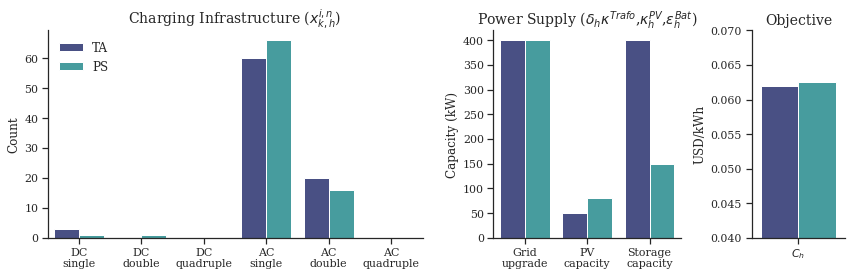

In [203]:
fig,axes=plt.subplots(nrows=1, ncols= 3, figsize=(12,4),sharex=False, gridspec_kw={'width_ratios': [2, 1,0.5]})
colors = sns.color_palette(palette, n_colors=9)
color_RL = colors[2]
color_RL2 = colors[3]
color_OPT = colors[-2]
color_OPT2 = colors[-3]

order = ["{}_{}_TA".format(routing[0],charging[0]),"{}_{}_PS".format(routing[0],charging[0])]

data_plot=data

ax=axes[0]
data_1=data_plot[data_plot["item"].isin(["DC\nsingle", "DC\ndouble", "DC\nquadruple","AC\nsingle", "AC\ndouble", "AC\nquadruple"])==True]
sns.barplot(ax=ax,data=data_1,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.set_title("Charging Infrastructure ($x^{i,n}_{k,h}$)",fontsize=14)

label_list = []
for t in ax.get_legend_handles_labels():
    # the first result will be all handles, i.e. the dots in the legend
    # the second result will be all legend text
    label_list.append(t)

ax.legend(handles=label_list[0], labels=["TA","PS"],loc="upper left",frameon=False,fontsize=12,)

ax=axes[1]
data_2=data_plot[data_plot["item"].isin(["Grid\nupgrade", "PV\ncapacity", "Storage\ncapacity"])==True]
sns.barplot(ax=ax,data=data_2,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Power Supply ($\delta_h \kappa^{Trafo}$,$\kappa^{PV}_{h}$,$\epsilon^{Bat}_h$)",fontsize=14)


ax=axes[2]
data_3=data_plot[data_plot["item"].isin(["$C_h$"])==True]
sns.barplot(ax=ax,data=data_3,x="item",y="value",hue="experiment",palette="mako",hue_order = order) #,labels=["RL-Slow Chargers","OPT-Slow Chargers"]
ax.legend().set_visible(False)
#ax.set_title("Storage Decisions ($\kappa^{Bat}_{s}$)")
ax.set_title("Objective",fontsize=14)
ax.set_ylim((0.04,0.07))

#set lables
#for ax in axes:
#    ax.set_xlabel("State")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("")
#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[1].set_ylabel("Capacity (kW)")
axes[1].set_xlabel("")

#axes[1].set_ylabel("Cumulative Number of Fast Chargers")
axes[2].set_ylabel("USD/kWh")
axes[2].set_xlabel("")

sns.despine(ax=axes[0], left=False, bottom=False)
sns.despine(ax=axes[1])
sns.despine(ax=axes[2])

plt.tight_layout()
plt.savefig("../visuals_output/storage_impact_analysis.pdf")
plt.show()

Investment Costs

In [126]:
data_costs = data[data["item"]=="Objective"]
data_costs["value_norm"] = data_costs["value"]/data_costs["value"].max()
data_costs

,item,value,facility,routing,charging,storage,facility_type,experiment,value_norm
9,Objective,1264.200251,Facility_1,CapaMatch,optimal,TA,Mixed-use,CapaMatch_optimal_TA,0.992211
19,Objective,1274.124404,Facility_1,CapaMatch,optimal,PS,Mixed-use,CapaMatch_optimal_PS,1.000000
